In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [14]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [15]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [16]:
from pandas import ExcelFile

In [17]:
df = pd.read_excel('VRC Historical Data.xlsx')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,2021-07-01,8120,8120,8150,8080,139.50K,0.0000
1,2021-07-02,8020,8100,8120,8020,208.00K,-0.0123
2,2021-07-05,7790,8020,8020,7740,362.40K,-0.0287
3,2021-07-06,7700,8000,8000,7700,258.20K,-0.0116
4,2021-07-07,7500,7690,7690,7430,236.60K,-0.0260


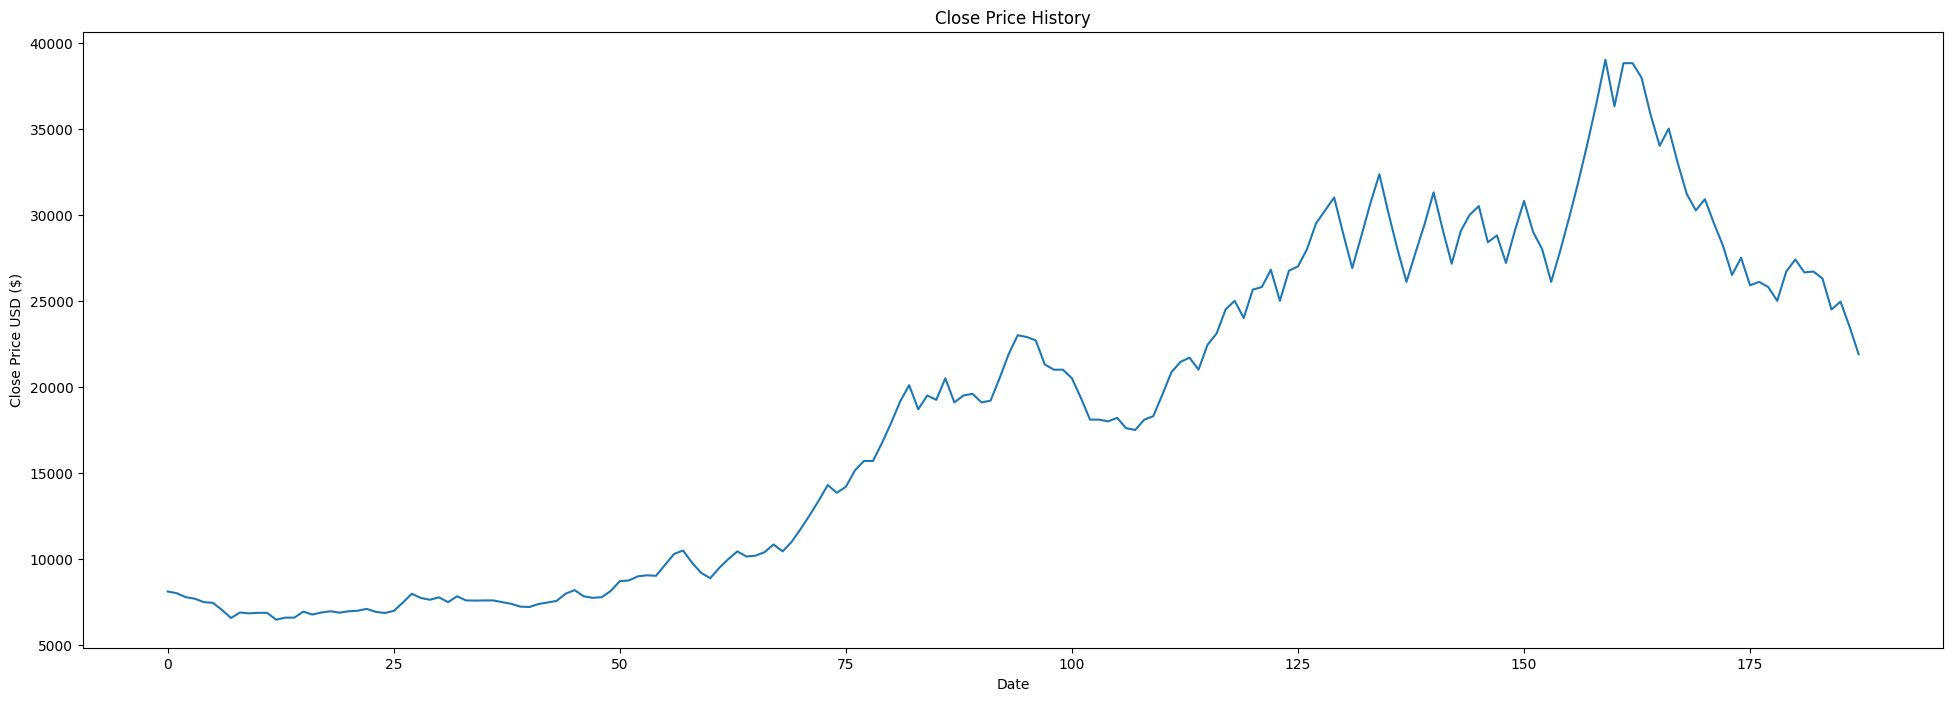

In [18]:
plt.figure(figsize=(24,8))
plt.title('Close Price History')
plt.plot(df['Price'])
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.show()

In [19]:
# Create a new dataframe with only the 'Price column 
data = df.filter(['Price'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset)) - 62)

training_data_len

126

In [20]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0504305 ],
       [0.04735547],
       [0.0402829 ],
       [0.03751538],
       [0.03136531],
       [0.0301353 ],
       [0.01752768],
       [0.00307503],
       [0.01291513],
       [0.01137761],
       [0.01230012],
       [0.01230012],
       [0.        ],
       [0.00369004],
       [0.00369004],
       [0.01445264],
       [0.00922509],
       [0.01291513],
       [0.01506765],
       [0.01260763],
       [0.01506765],
       [0.01599016],
       [0.01937269],
       [0.01414514],
       [0.01199262],
       [0.01568266],
       [0.0304428 ],
       [0.04643296],
       [0.03874539],
       [0.03567036],
       [0.0399754 ],
       [0.03136531],
       [0.04182042],
       [0.03444034],
       [0.03413284],
       [0.03444034],
       [0.03444034],
       [0.03136531],
       [0.02829028],
       [0.02337023],
       [0.02275523],
       [0.02798278],
       [0.03075031],
       [0.03351784],
       [0.04643296],
       [0.05289053],
       [0.04182042],
       [0.039

In [21]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

predictions_days = 60

for i in range(predictions_days, len(train_data)):
    x_train.append(train_data[i-predictions_days:i, 0])
    y_train.append(train_data[i, 0])
    if i<= (predictions_days + 1):
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.0504305 , 0.04735547, 0.0402829 , 0.03751538, 0.03136531,
       0.0301353 , 0.01752768, 0.00307503, 0.01291513, 0.01137761,
       0.01230012, 0.01230012, 0.        , 0.00369004, 0.00369004,
       0.01445264, 0.00922509, 0.01291513, 0.01506765, 0.01260763,
       0.01506765, 0.01599016, 0.01937269, 0.01414514, 0.01199262,
       0.01568266, 0.0304428 , 0.04643296, 0.03874539, 0.03567036,
       0.0399754 , 0.03136531, 0.04182042, 0.03444034, 0.03413284,
       0.03444034, 0.03444034, 0.03136531, 0.02829028, 0.02337023,
       0.02275523, 0.02798278, 0.03075031, 0.03351784, 0.04643296,
       0.05289053, 0.04182042, 0.03905289, 0.0402829 , 0.05135301,
       0.06888069, 0.0701107 , 0.07749077, 0.07933579, 0.07841328,
       0.09778598, 0.11746617, 0.12361624, 0.10147601, 0.08364084])]
[0.07410824108241079]

[array([0.0504305 , 0.04735547, 0.0402829 , 0.03751538, 0.03136531,
       0.0301353 , 0.01752768, 0.00307503, 0.01291513, 0.01137761,
       0.01230012, 0.01230012, 0.  

In [22]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(128, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=25)

Epoch 1/25
66/66 [==============================] - 3s 12ms/step - loss: 0.0105
Epoch 2/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0048
Epoch 3/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0043
Epoch 4/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0029
Epoch 5/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0024
Epoch 6/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0022
Epoch 7/25
66/66 [==============================] - 1s 13ms/step - loss: 0.0026
Epoch 8/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 9/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0019
Epoch 10/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0017
Epoch 11/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0015
Epoch 12/25
66/66 [==============================] - 1s 12ms/step - loss: 0.0026
Epoch 13/25
66/66 [==================

In [23]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - predictions_days: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(predictions_days, len(test_data)):
    x_test.append(test_data[i-predictions_days:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 20ms/step


1966.0682076897824

C:\Users\DELL\AppData\Local\Temp\ipykernel_7392\2294235708.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


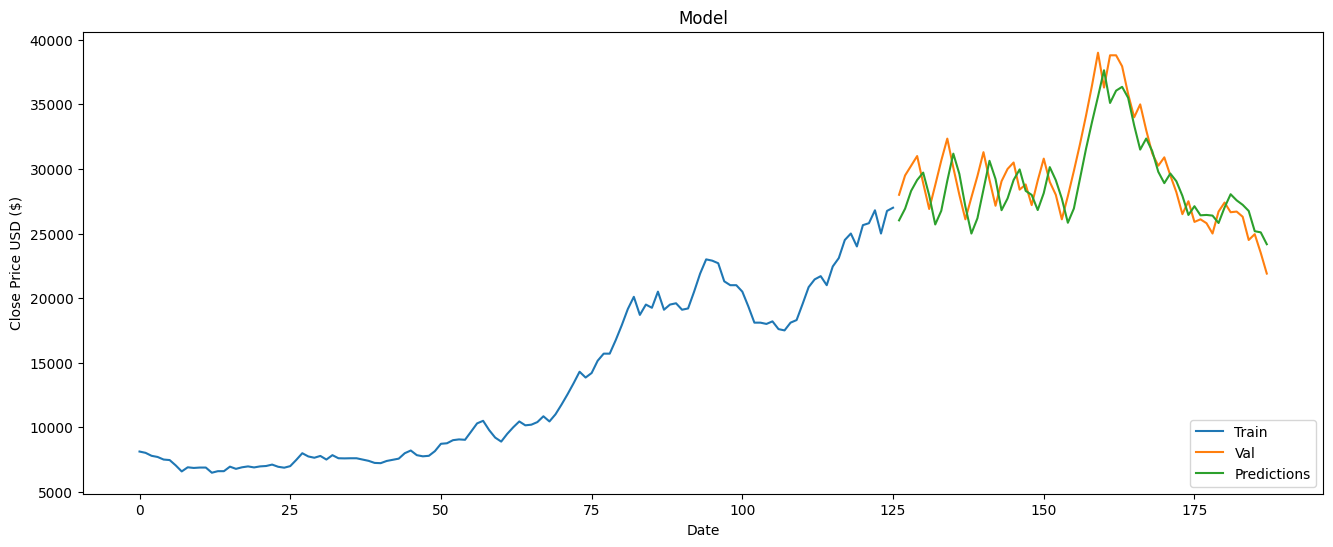

In [24]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Price'])
plt.plot(valid[['Price', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()